1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset


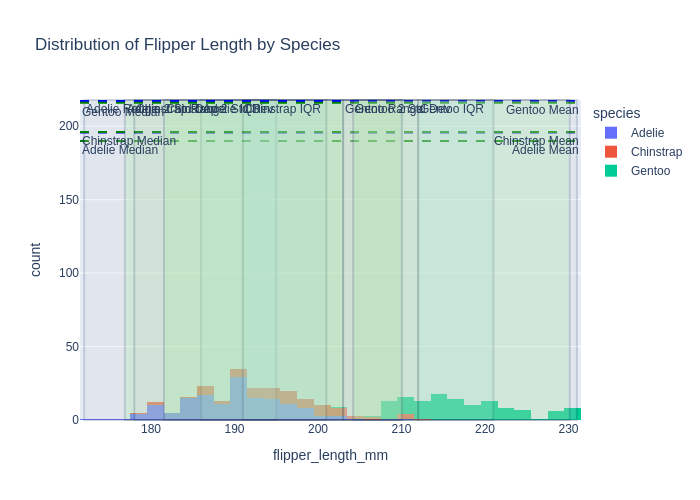

In [19]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop missing values for flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create histograms for flipper_length_mm, grouped by species
fig = px.histogram(penguins, x='flipper_length_mm', color='species', nbins=30, title='Distribution of Flipper Length by Species')

# Get statistics for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75),
    std='std'
).reset_index()

# Add lines and rectangles for each species
for _, row in species_stats.iterrows():
    species = row['species']
    
    # Mean (horizontal line)
    fig.add_hline(y=row['mean'], line=dict(color='blue', dash='dash'), annotation_text=f'{species} Mean', annotation_position='bottom right')
    
    # Median (horizontal line)
    fig.add_hline(y=row['median'], line=dict(color='green', dash='dash'), annotation_text=f'{species} Median', annotation_position='bottom left')
    
    # Range (vertical rectangle)
    fig.add_vrect(x0=row['min'], x1=row['max'], fillcolor='lightgray', opacity=0.2, annotation_text=f'{species} Range', annotation_position='top left')
    
    # IQR (vertical rectangle)
    fig.add_vrect(x0=row['q1'], x1=row['q3'], fillcolor='lightblue', opacity=0.2, annotation_text=f'{species} IQR', annotation_position='top left')
    
    # Two standard deviations from the mean (vertical rectangle)
    two_std_low = row['mean'] - 2 * row['std']
    two_std_high = row['mean'] + 2 * row['std']
    fig.add_vrect(x0=two_std_low, x1=two_std_high, fillcolor='lightgreen', opacity=0.2, annotation_text=f'{species} 2 Std Dev', annotation_position='top left')

# Show the figure
fig.show('png')

2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots


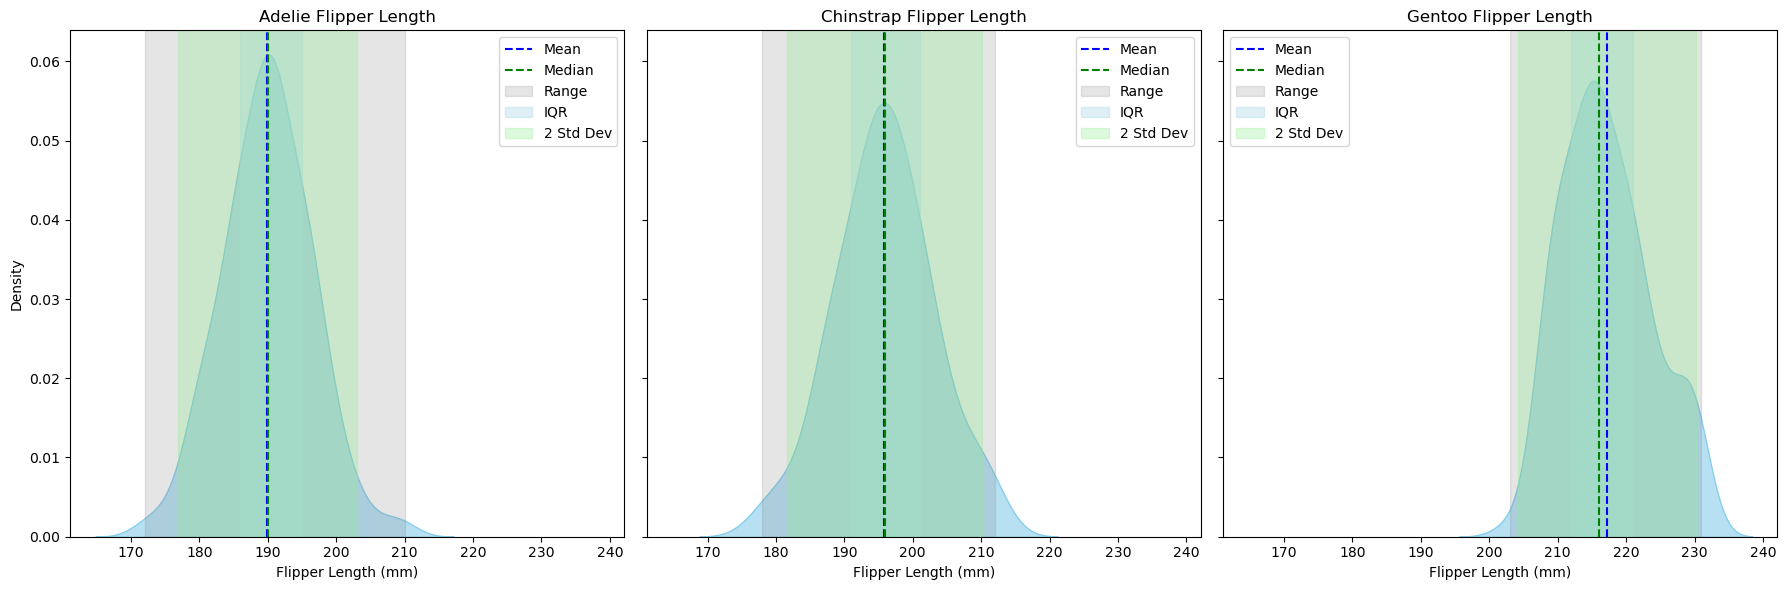

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop missing values for flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Set up the figure for three KDE plots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Get statistics for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75),
    std='std'
).reset_index()

# List of species for iteration
species_list = species_stats['species'].tolist()

# Plot KDE for each species in a separate subplot
for i, species in enumerate(species_list):
    ax = axes[i]
    sns.kdeplot(penguins[penguins['species'] == species]['flipper_length_mm'], ax=ax, fill=True, color='skyblue', alpha=0.6)
    
    # Get the statistics for the current species
    stats = species_stats[species_stats['species'] == species].iloc[0]
    
    # Mean and Median lines
    ax.axvline(stats['mean'], color='blue', linestyle='--', label='Mean')
    ax.axvline(stats['median'], color='green', linestyle='--', label='Median')
    
    # Range (shaded area)
    ax.axvspan(stats['min'], stats['max'], color='gray', alpha=0.2, label='Range')
    
    # IQR (shaded area)
    ax.axvspan(stats['q1'], stats['q3'], color='lightblue', alpha=0.4, label='IQR')
    
    # Two standard deviations (shaded area)
    two_std_low = stats['mean'] - 2 * stats['std']
    two_std_high = stats['mean'] + 2 * stats['std']
    ax.axvspan(two_std_low, two_std_high, color='lightgreen', alpha=0.3, label='2 Std Dev')
    
    # Set the title and labels
    ax.set_title(f'{species} Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

    # Add a legend
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show('png')

3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference


    I have told CHATGPT that box plots look like separated boxes, histograms look like boxes stacked together and kernel density estimators look the same as curve lines. Chatgpt agrees with my point. I learned from further investigation with Cahtgpt that Box plots show clear statistics such as median, IQR and potential outliers. However, Box plots do not display the frequency of the data. Histograms are good at providing a clear view of the data's distribution and frequency; you can also see the shape of your data, which gives you an idea of whether it is increasing or decreasing. But, histograms are not effective for small data because of the number of bins that can distort the shape of data. Furthermore, histograms do not provide a summary of statistics. The kernel density estimator offers a smooth and continuous curve, which allows you to visualize the data distribution's shape. However, kernel density is generally more challenging for beginners to interpret. Overall, I prefer the kernel density estimator because it looks smoother and can also show the peak levels of data distribution.

4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
   1. Which datasets have similar means and similar variances
       Dataset A and C
   2. Which datasets have similar means but quite different variances
       Dataset A and B
       Dataset B and C
   3. Which datasets have similar variances but quite different means
       Dataset B and D
   4. Which datasets have quite different means and quite different variances
       Dataset A and D
       Dataset C and D

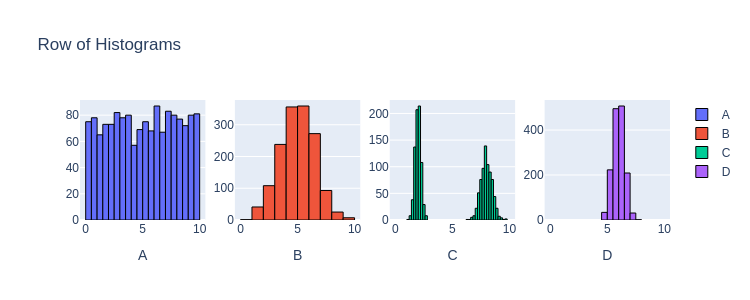

In [13]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [5]:
from scipy import stats
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample size
n = 1500

# Generate datasets with different distributions
data1 = stats.uniform.rvs(0, 10, size=n)  # Uniform
data2 = stats.norm.rvs(5, 1.5, size=n)    # Normal with mean 5 and std dev 1.5
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]  # Bimodal
data4 = stats.norm.rvs(6, 0.5, size=n)    # Normal with mean 6 and std dev 0.5

# Create a DataFrame to store data and calculate means and variances
df = pd.DataFrame({
    'Data A': data1,
    'Data B': data2,
    'Data C': data3,
    'Data D': data4
})

# Calculate means and variances
means = df.mean()
variances = df.var()

# Print means and variances
print("Means:")
print(means)
print("\nVariances:")
print(variances)

# Visualize the distributions
fig = make_subplots(rows=1, cols=4, subplot_titles=["Data A", "Data B", "Data C", "Data D"])

# Add histograms to compare distributions
fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Update layout for the plot
fig.update_layout(height=400, width=1200, title_text="Distributions of Datasets")

# Show the plot
fig.show()

# Now, categorizing the datasets based on means and variances
categories = {
    "Similar means and similar variances": [],
    "Similar means but different variances": [],
    "Similar variances but different means": [],
    "Different means and different variances": []
}

# Tolerance for similarity in means and variances
mean_tolerance = 0.5
variance_tolerance = 1.0

# Comparing means and variances
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        col1 = df.columns[i]
        col2 = df.columns[j]

        mean_diff = abs(means[col1] - means[col2])
        variance_diff = abs(variances[col1] - variances[col2])

        if mean_diff < mean_tolerance and variance_diff < variance_tolerance:
            categories["Similar means and similar variances"].append((col1, col2))
        elif mean_diff < mean_tolerance and variance_diff >= variance_tolerance:
            categories["Similar means but different variances"].append((col1, col2))
        elif mean_diff >= mean_tolerance and variance_diff < variance_tolerance:
            categories["Similar variances but different means"].append((col1, col2))
        else:
            categories["Different means and different variances"].append((col1, col2))

# Print the categories
for category, pairs in categories.items():
    print(f"\n{category}:")
    for pair in pairs:
        print(f"{pair[0]} and {pair[1]}")


Means:
Data A    4.952045
Data B    5.049167
Data C    5.010341
Data D    6.021978
dtype: float64

Variances:
Data A    8.351943
Data B    2.143850
Data C    9.175239
Data D    0.250740
dtype: float64



Similar means and similar variances:
Data A and Data C

Similar means but different variances:
Data A and Data B
Data B and Data C

Similar variances but different means:

Different means and different variances:
Data A and Data D
Data B and Data D
Data C and Data D


5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.


In [9]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data


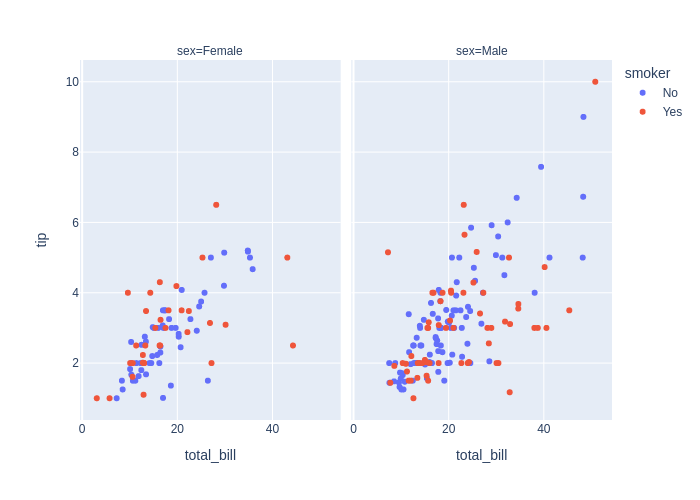

In [21]:
# This is my Dataset
import plotly.express as px
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex")
fig.show('png')

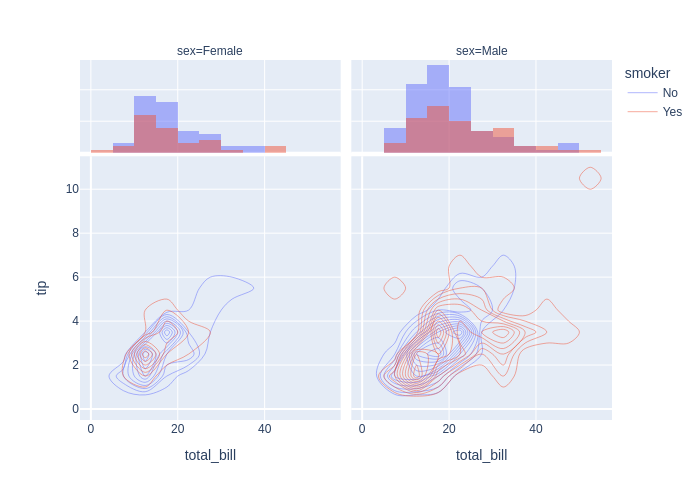

In [22]:
# Meaningful activity
import plotly.express as px

# Load the dataset
df = px.data.tips()

# Create the kernel density estimator (KDE) plot using density_contour
fig = px.density_contour(df, x="total_bill", y="tip", color="smoker", facet_col="sex", marginal_x="histogram", marginal_y="histogram")

# Show the plot
fig.show('png')


    I like these two graphs because they now form curves and circles on the bottom of each data distribution, and it looks like an open pit coal mine from the top view. Now, it is also easy to visualize peak levels.


    CHATBOT CONVERSATION:https://chatgpt.com/share/66f4c22b-b974-800e-935d-e286db96953b 